In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import date, datetime, time, timedelta
from babel.dates import format_date, format_datetime, format_time, format_timedelta, Locale
import locale                                    # para tratar de poner espanol
#locale = Locale('es', 'CL')
#locale.setlocale(locale.LC_ALL,'es_ES.UTF-8')  

import os
import runpy
from pyexcel_ods import get_data

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

#importo sólo algunas de mis funciones, dejo otras excluídas....

In [2]:
# cargo algunos scripts que me suelen servir para análisis

In [3]:
#listo los archivos
scripts = []
for dirname, dirnames, filenames in os.walk('/home/egidio/Dropbox/Compucosas/programas py'):
    for filename in filenames:
        scripts.append(os.path.join(dirname, filename))

scripts

# los cargo
for script in scripts:
    if script[-3:] == '.py':
        exec(open(str(script)).read())

['/home/egidio/Dropbox/Compucosas/programas py/percentiles.py',
 '/home/egidio/Dropbox/Compucosas/programas py/características_operativas_de_test.py',
 '/home/egidio/Dropbox/Compucosas/programas py/lector_ODF.py',
 '/home/egidio/Dropbox/Compucosas/programas py/como importar',
 '/home/egidio/Dropbox/Compucosas/programas py/tabala_frecuencias.py',
 '/home/egidio/Dropbox/Compucosas/programas py/descripcion_univariada.py',
 '/home/egidio/Dropbox/Compucosas/programas py/__pycache__/características_operativas_de_test.cpython-36.pyc',
 '/home/egidio/Dropbox/Compucosas/programas py/__pycache__/tabala_frecuencias.cpython-36.pyc',
 '/home/egidio/Dropbox/Compucosas/programas py/__pycache__/lector_ODF.cpython-36.pyc',
 '/home/egidio/Dropbox/Compucosas/programas py/__pycache__/percentiles.cpython-36.pyc',
 '/home/egidio/Dropbox/Compucosas/programas py/__pycache__/funciones_locales.cpython-36.pyc',
 '/home/egidio/Dropbox/Compucosas/programas py/__pycache__/descripcion_univariada.cpython-36.pyc']

# Busco las BDs diponibles

Busco las BD siponibles en la carpeta./BD, las que buscaré y las juntaré en un solo archivo

In [4]:
datos = []
for dirname, dirnames, filenames in os.walk('../BD llamadas/'):
    for filename in filenames:
        datos.append(os.path.join(dirname, filename))
datos

['../BD llamadas/CDR 2020-part.csv',
 '../BD llamadas/CDR 2019-3.csv',
 '../BD llamadas/CDR 2018-1.csv',
 '../BD llamadas/CDR 2019-2.csv',
 '../BD llamadas/CDR 2019-1.csv',
 '../BD llamadas/CDR 2017-2.csv',
 '../BD llamadas/CDR 2020-1.csv',
 '../BD llamadas/CDR 2017-1.csv',
 '../BD llamadas/CDR 2018-2.csv',
 '../BD llamadas/Bases de datos CDR.md',
 '../BD llamadas/CDR 2018-3.csv']

selecciono algunos...

In [5]:
archivos_llamadas = [f for f in datos if '.csv' in f]
archivos_llamadas

['../BD llamadas/CDR 2020-part.csv',
 '../BD llamadas/CDR 2019-3.csv',
 '../BD llamadas/CDR 2018-1.csv',
 '../BD llamadas/CDR 2019-2.csv',
 '../BD llamadas/CDR 2019-1.csv',
 '../BD llamadas/CDR 2017-2.csv',
 '../BD llamadas/CDR 2020-1.csv',
 '../BD llamadas/CDR 2017-1.csv',
 '../BD llamadas/CDR 2018-2.csv',
 '../BD llamadas/CDR 2018-3.csv']

dejo todo lo que tengo como un solo objeto: BD

In [6]:
BD = pd.DataFrame()

In [7]:
dum = pd.read_csv('../BD llamadas/CDR 2017-1.csv', encoding = "ISO-8859-1")
dum.head(3)
BD = BD.append(dum)

dum = pd.read_csv('../BD llamadas/CDR 2017-2.csv', encoding = "ISO-8859-1")
dum.head(3)
BD = BD.append(dum)

/home/egidio/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,calldate,clid,src,dst,dcontext,channel,dstchannel,lastapp,lastdata,duration,billsec,disposition,amaflags,accountcode,uniqueid,userfield
0,2017-06-30 23:59:29,SAMU 201 <201>,201,205,from-internal,SIP/201-000022aa,SIP/205-000022ab,Dial,"SIP/205,,trI",29,24,ANSWERED,3,NaN,1.498882e+09,NaN
1,2017-06-30 23:58:55,SAMU 201 <201>,201,205,from-internal,SIP/201-000022a8,SIP/205-000022a9,Dial,"SIP/205,,trI",2,0,NO ANSWER,3,NaN,1.498882e+09,NaN
2,2017-06-30 23:58:01,SAMU 203 <203>,203,9945452736,from-internal,SIP/203-000022a7,DAHDI/3-1,Dial,"DAHDI/3/945452736,300,",44,39,ANSWERED,3,NaN,1.498881e+09,NaN


,calldate,clid,src,dst,dcontext,channel,dstchannel,lastapp,lastdata,duration,billsec,disposition,amaflags,accountcode,uniqueid,userfield
0,2017-12-31 23:57:05,SAMU 201 <201>,201.0,208,from-internal,SIP/201-00007cb2,SIP/208-00007cb3,Dial,"SIP/208,,trI",9,6,ANSWERED,3,NaN,1.514772e+09,NaN
1,2017-12-31 23:56:07,0977974236 <0977974236>,977974236.0,131,ext-queues,DAHDI/1-1,SIP/203-00007cb1,Queue,"131,t,,,,,,,,",53,52,ANSWERED,3,NaN,1.514772e+09,NaN
2,2017-12-31 23:54:52,0984324180 <0984324180>,984324180.0,s,ivr-4,DAHDI/1-1,NaN,WaitExten,"1,",8,7,ANSWERED,3,NaN,1.514772e+09,NaN


In [8]:
dum = pd.read_csv('../BD llamadas/CDR 2018-1.csv', encoding = "ISO-8859-1")
dum.head(3)
BD = BD.append(dum)

dum = pd.read_csv('../BD llamadas/CDR 2018-2.csv', encoding = "ISO-8859-1")
dum.head(3)
BD = BD.append(dum)

dum = pd.read_csv('../BD llamadas/CDR 2018-3.csv', encoding = "ISO-8859-1")
dum.head(3)
BD = BD.append(dum)

,calldate,clid,src,dst,dcontext,channel,dstchannel,lastapp,lastdata,duration,billsec,disposition,amaflags,accountcode,uniqueid,userfield
0,2018-04-30 23:58:20,0959286957 <0959286957>,959286957.0,131,ext-queues,DAHDI/1-1,SIP/202-000001a6,Queue,"131,t,,,,,,,,",27,26,ANSWERED,3,NaN,1.525144e+09,NaN
1,2018-04-30 23:58:05,SAMU 203 <203>,203.0,205,from-internal,SIP/203-000001a4,SIP/205-000001a5,Dial,"SIP/205,,trI",293,288,ANSWERED,3,NaN,1.525143e+09,NaN
2,2018-04-30 23:56:55,0959286957 <0959286957>,959286957.0,131,ext-queues,DAHDI/1-1,SIP/202-000001a3,Queue,"131,t,,,,,,,,",24,22,ANSWERED,3,NaN,1.525143e+09,NaN


/home/egidio/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,calldate,clid,src,dst,dcontext,channel,dstchannel,lastapp,lastdata,duration,billsec,disposition,amaflags,accountcode,uniqueid,userfield
0,2018-08-31 23:59:31,0997159155 <0997159155>,9.97159e+08,131,ext-queues,DAHDI/1-1,SIP/202-0000955b,Queue,"131,t,,,,,,,,",30,29,ANSWERED,3,NaN,1.535771e+09,NaN
1,2018-08-31 23:41:13,SAMU 200 <200>,200,208,from-internal,SIP/200-00009555,SIP/208-00009556,Dial,"SIP/208,,trI",133,124,ANSWERED,3,NaN,1.535770e+09,NaN
2,2018-08-31 23:41:10,SAMU 202 <202>,202,205,from-internal,SIP/202-00009553,SIP/205-00009554,Dial,"SIP/205,,trI",51,44,ANSWERED,3,NaN,1.535770e+09,NaN


/home/egidio/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,calldate,clid,src,dst,dcontext,channel,dstchannel,lastapp,lastdata,duration,billsec,disposition,amaflags,accountcode,uniqueid,userfield
0,2018-12-31 23:58:46,SAMU 202 <202>,202,212,from-internal,SIP/202-00020b5e,SIP/212-00020b5f,Dial,"SIP/212,,trI",27,24,ANSWERED,3,NaN,1.546308e+09,NaN
1,2018-12-31 23:58:31,0995107567 <0995107567>,0995107567,131,ext-queues,DAHDI/1-1,SIP/201-00020b5d,Queue,"131,tr,,,,,,,,",370,369,ANSWERED,3,NaN,1.546308e+09,NaN
2,2018-12-31 23:54:03,201,201,9322592910,from-internal,SIP/201-00020b5c,DAHDI/2-1,Dial,"DAHDI/2/322592910,300,",100,96,ANSWERED,3,NaN,1.546308e+09,NaN


In [9]:
dum = pd.read_csv('../BD llamadas/CDR 2019-1.csv', encoding = "ISO-8859-1")
dum.head(3)
BD = BD.append(dum)

dum = pd.read_csv('../BD llamadas/CDR 2019-2.csv', encoding = "ISO-8859-1")
dum.head(3)
BD = BD.append(dum)

dum = pd.read_csv('../BD llamadas/CDR 2019-3.csv', encoding = "ISO-8859-1")
dum.head(3)
BD = BD.append(dum)

,calldate,clid,src,dst,dcontext,channel,dstchannel,lastapp,lastdata,duration,billsec,disposition,amaflags,accountcode,uniqueid,userfield
0,2019-04-30 23:53:49,569350562 <569350562>,569350562.0,131,ext-queues,DAHDI/7-1,SIP/204-00001db4,Queue,"131,t,,,,,,,,",523,522,ANSWERED,3,NaN,1.556683e+09,NaN
1,2019-04-30 23:52:43,950189234 <950189234>,950189234.0,131,ext-queues,DAHDI/4-1,SIP/200-00001db1,Queue,"131,t,,,,,,,,",32,31,ANSWERED,3,NaN,1.556683e+09,NaN
2,2019-04-30 23:52:43,950189234 <950189234>,950189234.0,206,from-internal,DAHDI/4-1,SIP/206-00001db3,Dial,"SIP/206,,trI",122,91,ANSWERED,3,NaN,1.556683e+09,NaN


/home/egidio/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,calldate,clid,src,dst,dcontext,channel,dstchannel,lastapp,lastdata,duration,billsec,disposition,amaflags,accountcode,uniqueid,userfield
0,2019-08-31 23:59:48,934194911 <934194911>,934194911,131,ext-queues,DAHDI/1-1,SIP/201-0001015b,Queue,"131,tr,,,,,,,,",92,91,ANSWERED,3,NaN,1.567310e+09,NaN
1,2019-08-31 23:59:37,208,208,9933766729,from-internal,SIP/208-00010159,DAHDI/2-1,Dial,"DAHDI/2/933766729,300,",38,34,ANSWERED,3,NaN,1.567310e+09,NaN
2,2019-08-31 23:58:27,934194911 <934194911>,934194911,131,ext-queues,DAHDI/5-1,SIP/206-00010158,Queue,"131,tr,,,,,,,,",47,46,ANSWERED,3,NaN,1.567310e+09,NaN


/home/egidio/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,calldate,clid,src,dst,dcontext,channel,dstchannel,lastapp,lastdata,duration,billsec,disposition,amaflags,accountcode,uniqueid,userfield
0,2019-12-31 23:59:38,205,205,9961772383,from-internal,SIP/205-00045d0f,DAHDI/2-1,Dial,"DAHDI/2/961772383,300,",283,279,ANSWERED,3,NaN,1.577848e+09,NaN
1,2019-12-31 23:58:57,972951556 <972951556>,972951556,131,ext-queues,DAHDI/6-1,SIP/203-00045d0e,Queue,"131,tr,,,,,,,,",618,617,ANSWERED,3,NaN,1.577848e+09,NaN
2,2019-12-31 23:57:24,993458902 <993458902>,993458902,131,ext-queues,DAHDI/5-1,NaN,Queue,"131,tr,,,,,,,,",7,6,ANSWERED,3,NaN,1.577847e+09,NaN


In [10]:
dum = pd.read_csv('../BD llamadas/CDR 2020-1.csv', encoding = "ISO-8859-1")
dum.head(3)
BD = BD.append(dum)

dum = pd.read_csv('../BD llamadas/CDR 2020-part.csv', encoding = "ISO-8859-1")
dum.head(3)
BD = BD.append(dum)

,calldate,clid,src,dst,dcontext,channel,dstchannel,lastapp,lastdata,duration,billsec,disposition,amaflags,accountcode,uniqueid,userfield
0,2020-04-30 23:59:41,5692065600 <5692065600>,5.692066e+09,131,ext-queues,DAHDI/6-1,NaN,Queue,"131,tr,,,,,,,,",7,6,ANSWERED,3,NaN,1.588306e+09,NaN
1,2020-04-30 23:59:40,966213874 <966213874>,9.662139e+08,131,ext-queues,DAHDI/7-1,SIP/206-00025ae8,Queue,"131,tr,,,,,,,,",246,245,ANSWERED,3,NaN,1.588306e+09,NaN
2,2020-04-30 23:55:41,992790404 <992790404>,9.927904e+08,131,ext-queues,DAHDI/2-1,SIP/202-00025ae7,Queue,"131,tr,,,,,,,,",21,20,ANSWERED,3,NaN,1.588305e+09,NaN


,calldate,clid,src,dst,dcontext,channel,dstchannel,lastapp,lastdata,duration,billsec,disposition,amaflags,accountcode,uniqueid,userfield
0,2020-05-10 20:01:05,933038649 <933038649>,933038649.0,131,ext-queues,DAHDI/6-1,NaN,Queue,"131,tr,,,,,,,,",26,25,ANSWERED,3,NaN,1.589155e+09,NaN
1,2020-05-10 19:58:21,933038649 <933038649>,933038649.0,131,ext-queues,DAHDI/6-1,SIP/203-00000096,Queue,"131,tr,,,,,,,,",11,10,ANSWERED,3,NaN,1.589155e+09,NaN
2,2020-05-10 19:57:19,SAMU 200 <200>,200.0,212,from-internal,SIP/200-00000094,SIP/212-00000095,Dial,"SIP/212,,trI",51,49,ANSWERED,3,NaN,1.589155e+09,NaN


In [11]:
BD.info()
BD = BD.sort_values('calldate')
BD = BD.reset_index(drop=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1116257 entries, 0 to 6805
Data columns (total 16 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   calldate     1116257 non-null  object 
 1   clid         1064638 non-null  object 
 2   src          1064635 non-null  object 
 3   dst          1116257 non-null  object 
 4   dcontext     1116257 non-null  object 
 5   channel      1116257 non-null  object 
 6   dstchannel   1022249 non-null  object 
 7   lastapp      1116257 non-null  object 
 8   lastdata     1080175 non-null  object 
 9   duration     1116257 non-null  int64  
 10  billsec      1116257 non-null  int64  
 11  disposition  1116257 non-null  object 
 12  amaflags     1116257 non-null  int64  
 13  accountcode  0 non-null        float64
 14  uniqueid     1116257 non-null  float64
 15  userfield    0 non-null        float64
dtypes: float64(3), int64(3), object(10)
memory usage: 144.8+ MB


# Comienzo a arreglar base de datos

dejo como timestamp el calldate

In [12]:
BD.calldate = pd.to_datetime(BD.calldate)

dejo como texto en número el calldate

In [13]:
dumm = BD.loc[BD.calldate > pd.to_datetime('2020-05-10 15:30')]
dumm
dumm.to_excel('../BD llamadas/dum.xls')

,calldate,clid,src,dst,dcontext,channel,dstchannel,lastapp,lastdata,duration,billsec,disposition,amaflags,accountcode,uniqueid,userfield
1116067,2020-05-10 15:30:53,942842047 <942842047>,9.42842e+08,131,ext-queues,DAHDI/6-1,SIP/206-000014e7,Queue,"131,tr,,,,,,,,",10,9,ANSWERED,3,NaN,1.589139e+09,NaN
1116068,2020-05-10 15:31:39,994539392 <994539392>,9.94539e+08,131,ext-queues,DAHDI/7-1,SIP/210-000014e8,Queue,"131,tr,,,,,,,,",15,14,ANSWERED,3,NaN,1.589139e+09,NaN
1116069,2020-05-10 15:31:54,994539392 <994539392>,9.94539e+08,205,from-internal,DAHDI/7-1,SIP/205-000014ea,Dial,"SIP/205,,trI",174,171,ANSWERED,3,NaN,1.589139e+09,NaN
1116070,2020-05-10 15:32:32,976712543 <976712543>,9.76713e+08,131,ext-queues,DAHDI/6-1,SIP/204-000014eb,Queue,"131,tr,,,,,,,,",301,300,ANSWERED,3,NaN,1.589139e+09,NaN
1116071,2020-05-10 15:33:07,976582529 <976582529>,9.76583e+08,131,ext-queues,DAHDI/2-1,SIP/206-000014ed,Queue,"131,tr,,,,,,,,",135,134,ANSWERED,3,NaN,1.589139e+09,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116252,2020-05-10 19:55:12,SAMU 200 <200>,200,932,from-internal,SIP/200-00000092,DAHDI/2-1,Dial,"DAHDI/2/32,300,",26,24,ANSWERED,3,NaN,1.589155e+09,NaN
1116253,2020-05-10 19:55:37,SAMU 200 <200>,200,9322592910,from-internal,SIP/200-00000093,DAHDI/4-1,Dial,"DAHDI/4/322592910,300,",64,60,ANSWERED,3,NaN,1.589155e+09,NaN
1116254,2020-05-10 19:57:19,SAMU 200 <200>,200,212,from-internal,SIP/200-00000094,SIP/212-00000095,Dial,"SIP/212,,trI",51,49,ANSWERED,3,NaN,1.589155e+09,NaN
1116255,2020-05-10 19:58:21,933038649 <933038649>,9.33039e+08,131,ext-queues,DAHDI/6-1,SIP/203-00000096,Queue,"131,tr,,,,,,,,",11,10,ANSWERED,3,NaN,1.589155e+09,NaN


In [14]:
BD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1116257 entries, 0 to 1116256
Data columns (total 16 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   calldate     1116257 non-null  datetime64[ns]
 1   clid         1064638 non-null  object        
 2   src          1064635 non-null  object        
 3   dst          1116257 non-null  object        
 4   dcontext     1116257 non-null  object        
 5   channel      1116257 non-null  object        
 6   dstchannel   1022249 non-null  object        
 7   lastapp      1116257 non-null  object        
 8   lastdata     1080175 non-null  object        
 9   duration     1116257 non-null  int64         
 10  billsec      1116257 non-null  int64         
 11  disposition  1116257 non-null  object        
 12  amaflags     1116257 non-null  int64         
 13  accountcode  0 non-null        float64       
 14  uniqueid     1116257 non-null  float64       
 15  userfield    0 

In [15]:
BD.columns

Index(['calldate', 'clid', 'src', 'dst', 'dcontext', 'channel', 'dstchannel',
       'lastapp', 'lastdata', 'duration', 'billsec', 'disposition', 'amaflags',
       'accountcode', 'uniqueid', 'userfield'],
      dtype='object')

In [16]:
BD = BD[['calldate', 'src', 'dst', 'channel',
        'dstchannel', 'lastapp', 'duration', 'billsec', 'disposition']]
BD.head()

,calldate,src,dst,channel,dstchannel,lastapp,duration,billsec,disposition
0,2017-02-22 20:54:07,204,990449123,SIP/204-00000000,DAHDI/1-1,Dial,12,8,ANSWERED
1,2017-02-22 20:54:30,204,9992239309,SIP/204-00000001,DAHDI/1-1,Dial,20,16,ANSWERED
2,2017-02-22 21:21:17,NaN,131,DAHDI/1-1,SIP/200-00000002,Queue,24,14,ANSWERED
3,2017-02-22 21:23:01,NaN,131,DAHDI/1-1,SIP/203-00000003,Queue,30,20,ANSWERED
4,2017-02-22 21:24:47,NaN,131,DAHDI/1-1,SIP/200-00000005,Queue,63,53,ANSWERED


# Arreglo nombres

In [17]:
BD.columns = ['Fecha', 'Origen_n', 'Destino_n', 'Origen_canal', 'Destino_canal',
              'Ultima', 'Duracion', 'Cobro', 'Estado']

In [18]:
BD.head()

,Fecha,Origen_n,Destino_n,Origen_canal,Destino_canal,Ultima,Duracion,Cobro,Estado
0,2017-02-22 20:54:07,204,990449123,SIP/204-00000000,DAHDI/1-1,Dial,12,8,ANSWERED
1,2017-02-22 20:54:30,204,9992239309,SIP/204-00000001,DAHDI/1-1,Dial,20,16,ANSWERED
2,2017-02-22 21:21:17,NaN,131,DAHDI/1-1,SIP/200-00000002,Queue,24,14,ANSWERED
3,2017-02-22 21:23:01,NaN,131,DAHDI/1-1,SIP/203-00000003,Queue,30,20,ANSWERED
4,2017-02-22 21:24:47,NaN,131,DAHDI/1-1,SIP/200-00000005,Queue,63,53,ANSWERED


# Corrijo la dispersión de la duración de la llamada por percentiles y 

count    1.116257e+06
mean     1.104549e+02
std      1.390493e+04
min     -1.078500e+04
25%      1.600000e+01
50%      3.900000e+01
75%      1.050000e+02
max      7.322404e+06
Name: Duracion, dtype: float64

rango sup es: 823.0 el inferior es:  1
Cantidad de llamadas <0:  12


Cantidad de valores corregidos


True     1110257
False       6000
Name: Duracion, dtype: int64

Text(0.5, 1.0, 'Duración en minutos de las llamadas corregidas')

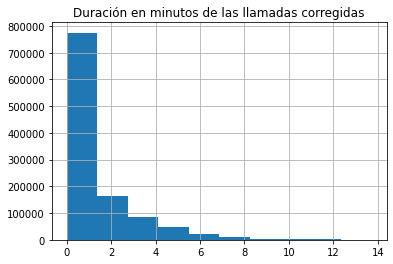

In [19]:
BD.Duracion.describe()
inf = 1
sup = BD.Duracion.quantile(0.999)
fixed = ((BD.Duracion>=inf) &
             (BD.Duracion<=sup)
        )
print('rango sup es:', sup, 'el inferior es: ', inf)
print('Cantidad de llamadas <0: ', BD.loc[BD.Duracion<0].Fecha.count())

print('\n')

print('Cantidad de valores corregidos')
fixed.value_counts()
(BD.loc[fixed].Duracion/60).hist()
plt.title('Duración en minutos de las llamadas corregidas')

## Arreglo: Fechas

In [20]:
BD['Fecha'].describe()

count                 1116257
unique                1107058
top       2017-06-02 23:35:28
freq                        4
first     2017-02-22 20:54:07
last      2020-05-10 20:01:05
Name: Fecha, dtype: object

count                 1116257
unique                1107058
top       2017-06-02 23:35:28
freq                        4
first     2017-02-22 20:54:07
last      2020-05-10 20:01:05
Name: Fecha, dtype: object

(19000.0, 40000.0)

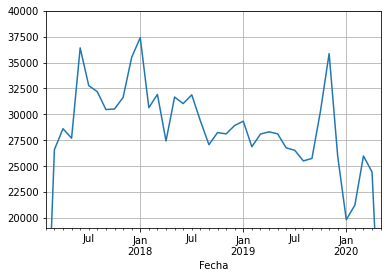

In [21]:
BD.Fecha.describe()
BD.groupby(BD.Fecha.dt.to_period('M')).Fecha.count().plot(grid=True)
plt.ylim([19000,40000])

# Cambio los nombres de los estados de las llamadas

In [22]:
BD = BD.replace({"Estado": {'ANSWERED': 'Contestada',
                            'BUSY': 'Ocupado',
                            'NO ANSWER': 'Sin respuesta'}
                }
               )

# ordeno lo que son los los números de origen y los canales

extraigo del tipo de canal el n SIP de destino

In [23]:
#extraigo del tipo de canal el n SIP de destino
BD['Destino_nSIP'] = BD['Destino_canal'].str.split('\D',expand=True)[4]

#extraigo el tipo de canal: SIP/trunk
BD.loc[
    BD['Origen_canal'].str.contains('SIP') == True,
    'Origen_tipo'] = 'SIP'
BD.loc[
    BD['Origen_canal'].str.contains('DAHDI') == True,
    'Origen_tipo'] = 'Trunk'
BD.loc[
    BD['Destino_canal'].str.contains('SIP') == True,
    'Destino_tipo'] = 'SIP'
BD.loc[
    BD['Destino_canal'].str.contains('DAHDI') == True,
    'Destino_tipo'] = 'Trunk'

Defino el tipo de llamada registrada según origen y destino

In [24]:
BD.loc[(BD.Origen_tipo == 'Trunk') & (BD.Destino_n == '131'),
      'Tipo_llamada'] = 'Hacia SAMU'
BD.loc[(BD.Origen_tipo == 'SIP') & (BD.Destino_tipo == 'Trunk'),
      'Tipo_llamada'] = 'Desde SAMU'
BD.loc[(BD.Origen_tipo == 'SIP') & (BD.Destino_tipo == 'SIP'),
      'Tipo_llamada'] = 'Entre SAMU'

In [25]:
BD = BD[['Fecha', 'Tipo_llamada',
           'Origen_tipo', 'Destino_tipo',
            'Origen_n', 'Destino_n', 'Destino_nSIP',
           'Estado', 'Duracion', 'Cobro']]
BD.head()

,Fecha,Tipo_llamada,Origen_tipo,Destino_tipo,Origen_n,Destino_n,Destino_nSIP,Estado,Duracion,Cobro
0,2017-02-22 20:54:07,Desde SAMU,SIP,Trunk,204,990449123,,Contestada,12,8
1,2017-02-22 20:54:30,Desde SAMU,SIP,Trunk,204,9992239309,,Contestada,20,16
2,2017-02-22 21:21:17,Hacia SAMU,Trunk,SIP,NaN,131,200,Contestada,24,14
3,2017-02-22 21:23:01,Hacia SAMU,Trunk,SIP,NaN,131,203,Contestada,30,20
4,2017-02-22 21:24:47,Hacia SAMU,Trunk,SIP,NaN,131,200,Contestada,63,53


agrego el 'fin de la llamada'

In [26]:
BD['Fin'] = BD.Fecha + pd.to_timedelta(BD.Duracion, 'S')

Traro de definir las llamadas perdidas

In [27]:
BD.loc[
    (BD.Tipo_llamada == 'Hacia SAMU') & (BD.Destino_nSIP.isna() == True),
    'Estado'] = 'Perdida'

tab_frec(BD.Estado)

BD.loc[
    (BD.Estado == 'Perdida') & (BD.Duracion<10),
    'Estado'] = 'No Válida'
tab_frec(BD.Estado)

,n,%
Estado,,
Contestada,1052311,94.27
Perdida,33003,2.96
Sin respuesta,27864,2.50
Ocupado,2839,0.25
FAILED,240,0.02
Total,1116257,100.00


,n,%
Estado,,
Contestada,1052311,94.27
Sin respuesta,27864,2.50
Perdida,26876,2.41
No Válida,6127,0.55
Ocupado,2839,0.25
FAILED,240,0.02
Total,1116257,100.00


In [28]:
a_categ = ['Tipo_llamada', 'Origen_tipo', 'Destino_tipo', 'Estado']
a_int   = ['Origen_n','Destino_n', 'Destino_nSIP']
for x in a_categ:
    BD[x] = BD[x].astype('category')
for x in a_int:
    BD[x] = pd.to_numeric(BD[x],errors='coerce')

In [29]:
dumm = BD.loc[BD.Fecha > pd.to_datetime('2020-03-10 15:30')]
dumm.head()
dumm.to_excel('../BD llamadas/dum2.xls')

,Fecha,Tipo_llamada,Origen_tipo,Destino_tipo,Origen_n,Destino_n,Destino_nSIP,Estado,Duracion,Cobro,Fin
1066438,2020-03-10 15:34:14,Hacia SAMU,Trunk,SIP,978344032.0,1.310000e+02,201.0,Contestada,7,6,2020-03-10 15:34:21
1066439,2020-03-10 15:34:20,Hacia SAMU,Trunk,SIP,957537731.0,1.310000e+02,201.0,Contestada,9,8,2020-03-10 15:34:29
1066440,2020-03-10 15:35:47,Hacia SAMU,Trunk,SIP,920314558.0,1.310000e+02,206.0,Contestada,20,19,2020-03-10 15:36:07
1066441,2020-03-10 15:36:34,Hacia SAMU,Trunk,SIP,920314558.0,1.310000e+02,201.0,Contestada,13,12,2020-03-10 15:36:47
1066442,2020-03-10 15:37:16,Desde SAMU,SIP,Trunk,200.0,9.322812e+09,NaN,Contestada,70,65,2020-03-10 15:38:26


In [30]:
SIP_131 = [200, 201, 202, 203, 204, 206, 210, 214]
SIP_regulador = [205, 209, 212]
SIP_despachador = [207, 208]

# Esporto la BD

In [31]:
BD.to_pickle('./llamadas.pkl')

Cooro el identificador de traspasos

In [32]:
#exec(open('./Identificador traspasos.py').read())

## Selecciono aquellas llamadas que son el resultado de un traspaso

busco aquellas llamadas que fueron traspasadas a otro teléfono considerando la duración de la llamada.....

In [33]:
# lista_llamdas_traspasadas = []
# inicio = datetime.now()
# inicio
# dum = BD.copy()
# for x in dum.index.values:
#     print (x)
#     if dum.loc[x].Tipo_llamada != 'Entre SAMU':
#         recive = dum.loc[x].Destino_nSIP
#         rango = dum.loc[(dum.Fecha < dum.loc[x].Fin) & (dum.Fecha > dum.loc[x].Fecha)]
#         #rango
#         if (rango.shape[0] !=0):
#             #(rango.Tipo_llamada == 'Entre SAMU')
#             print('inicio shape ')
#             print('SIP:', recive)
#             rango.shape
            
#             indice = list(rango.loc[
#                 (rango.Origen_n == recive) &
#                 (rango.Estado == 'Contestada')].tail(1).index
#                          )
# #             if indice.shape[0] !=0:
#             if len(indice) !=0:
#                 print('INGRESADO!!', dum.loc[x].Fecha)
#                 lista_llamdas_traspasadas.append(indice[0])
#             print('fin shape ')
#         print('------------------------------------')
#     print('next')
# len(lista_llamdas_traspasadas)
# datetime.now() - inicio

In [34]:
# BD.loc[BD.index.isin(lista_llamdas_traspasadas), 'Trapaso'] = 'Si'
# BD.loc[BD.index.isin(lista_llamdas_traspasadas)== False, 'Trapaso'] = 'No'

In [35]:
# BD.Trapaso.value_counts()

# Datos generales

In [36]:
BD.columns

Index(['Fecha', 'Tipo_llamada', 'Origen_tipo', 'Destino_tipo', 'Origen_n',
       'Destino_n', 'Destino_nSIP', 'Estado', 'Duracion', 'Cobro', 'Fin'],
      dtype='object')

count                 1116257
unique                1107058
top       2017-06-02 23:35:28
freq                        4
first     2017-02-22 20:54:07
last      2020-05-10 20:01:05
Name: Fecha, dtype: object

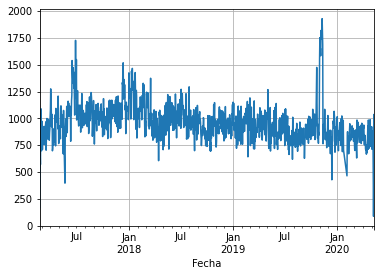

In [37]:
BD.Fecha.describe()
BD.groupby(BD.Fecha.dt.to_period('d')).Fecha.count().plot(grid=True)

In [38]:
BD.head()
tab_frec(BD.Tipo_llamada)
tab_frec(BD.Estado)


,Fecha,Tipo_llamada,Origen_tipo,Destino_tipo,Origen_n,Destino_n,Destino_nSIP,Estado,Duracion,Cobro,Fin
0,2017-02-22 20:54:07,Desde SAMU,SIP,Trunk,204.0,9.904491e+08,NaN,Contestada,12,8,2017-02-22 20:54:19
1,2017-02-22 20:54:30,Desde SAMU,SIP,Trunk,204.0,9.992239e+09,NaN,Contestada,20,16,2017-02-22 20:54:50
2,2017-02-22 21:21:17,Hacia SAMU,Trunk,SIP,NaN,1.310000e+02,200.0,Contestada,24,14,2017-02-22 21:21:41
3,2017-02-22 21:23:01,Hacia SAMU,Trunk,SIP,NaN,1.310000e+02,203.0,Contestada,30,20,2017-02-22 21:23:31
4,2017-02-22 21:24:47,Hacia SAMU,Trunk,SIP,NaN,1.310000e+02,200.0,Contestada,63,53,2017-02-22 21:25:50


,n,%
Tipo_llamada,,
Hacia SAMU,526915,52.50
Entre SAMU,239572,23.87
Desde SAMU,237165,23.63
Total,1003652,100.00


,n,%
Estado,,
Contestada,1052311,94.27
Sin respuesta,27864,2.50
Perdida,26876,2.41
No Válida,6127,0.55
Ocupado,2839,0.25
FAILED,240,0.02
Total,1116257,100.00
